In [3]:
#Install pip
!pip install pyLDAvis
!pip install wordcloud
!pip install bokeh
!pip install gensim
!pip install matplotlib
!pip install numpy
!pip install pandas-profiling
!pip install bokeh

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [4]:
#All necessary libraries import statements
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import spacy
import pyLDAvis
import pyLDAvis.gensim 
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
%matplotlib inline
import plotly.express as px
import plotly.offline as pxo
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS 
import pandas as pd 
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
pxo.init_notebook_mode()

Loading BokehJS ...

In [5]:
#Mandatory input parameter for the big data dataset to be loaded
#Assumptions: The structure should be in the format of the input dataset below.
mandatoryDataSetInput = "news_headlines_dataset.csv"

In [6]:
#Stop words formation
stopWords = stopwords.words("english")
additionalwords = ['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across']
wordsFromScikit= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']
stopWords.extend(additionalwords)
stopWords.extend(wordsFromScikit)

In [7]:
print("Number of stop words: ",len(stopWords))

Number of stop words:  502


In [8]:
import pandas as pd
newsInput = pd.read_csv(mandatoryDataSetInput)
newsInput.head()

ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PUBLISHER  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  CATEGORY                          STORY             HOSTNAME      TIMESTAMP  
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com  1394470370698  
1        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM     www.livemint.com  1394470371207  
2        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM  www.ifamagazine.com  1394470371550  
3        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM  www.ifamagazine.com  1394470371793  
4        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM    www.moneynews.com  1394470372027

# Dataset Exploration

In [9]:
profile = ProfileReport(newsInput, title="Topic Modeling Profiling Report")
profile

In [10]:
#Fetching all the categories data 
bcategory = newsInput[newsInput.CATEGORY == 'b']
tcategory = newsInput[newsInput.CATEGORY == 't']
ecategory = newsInput[newsInput.CATEGORY == 'e']
mcategory = newsInput[newsInput.CATEGORY == 'm']
# print(bcategory,tcategory,mcategory,ecategory)

In [11]:
#take 750 random data if needed otherwise don't run the cell otherwise it will take the whole big data dataset and run 
bcategoryData = bcategory.sample(n=750)
tcategoryData = tcategory.sample(n=750)
ecategoryData = tcategory.sample(n=750)
mcategoryData = mcategory.sample(n=750)

In [12]:
#appends all category data 
data = bcategoryData.append([tcategoryData,ecategoryData,mcategoryData])

In [13]:
#takes the title which is the headlines and the category from the dataset
title = data['TITLE']
category = data['CATEGORY']
df = data.TITLE.values.tolist()
# pprint(df)

In [14]:
#drop na values from the dataset
data = data.dropna()
len(data)

3000

# Data exploration plots

In [15]:
# bar chart of publisher and category
fig = px.bar(data, x='PUBLISHER', y='CATEGORY')
fig.show()

In [16]:
#Timestamp plotted with title shows values on broad varieties of data collected satisfying the needs of big data
fig = px.line(data, x='TITLE', y='TIMESTAMP')
fig.show()

# Formed wordcloud of unigram and bigrams of dataset

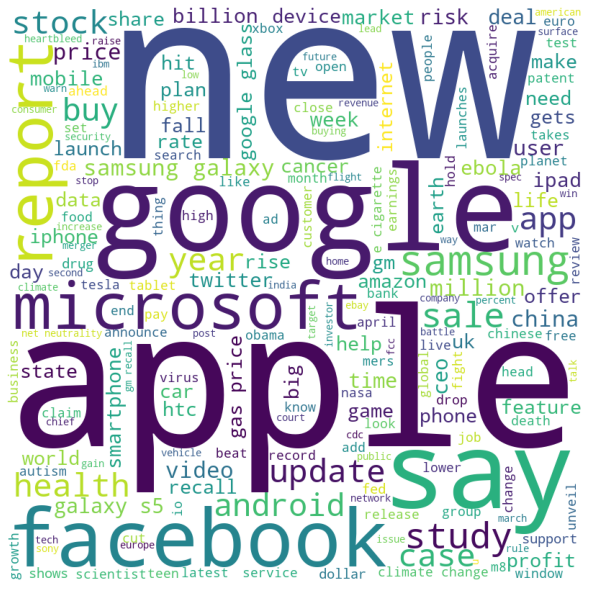

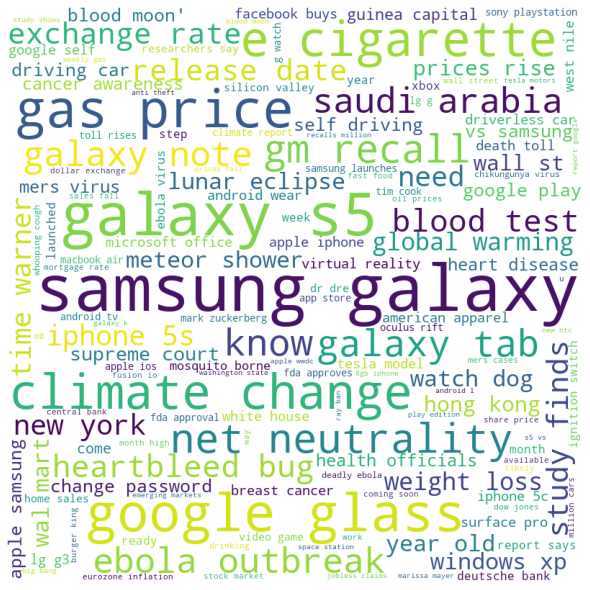

In [17]:
def wordCloudGeneration(wordCloudType='unigram'):
    comment_words = '' 
#     stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in data.TITLE: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "
    # plot the WordCloud image  
    plt.figure(figsize = (8, 8), facecolor = None) 
    
    if wordCloudType=='unigram':
        unigramWordCloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopWords, 
                        min_font_size = 10).generate(comment_words) 
        plt.imshow(unigramWordCloud) 
    else: 
        bigramWordCloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopWords, 
                        collocation_threshold = 3,
                        min_font_size = 10).generate(comment_words) 
        plt.imshow(bigramWordCloud)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
wordCloudGeneration('unigram') #unigram word cloud generation
wordCloudGeneration('bigram') #bigram word cloud generation

# Preprocessing class

In [18]:
class Preprocessing:

    def cleanup_sentences(self,df): 
        df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]
        df = [re.sub('\s+', ' ', sent) for sent in df]
        # Remove distracting single quotes
        df = [re.sub("\'", "", sent) for sent in df]
        df = [re.sub("-", " ", sent) for sent in df]
        df = [re.sub(":", "", sent) for sent in df]
        return df

    def sentence_to_words(self,sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

    def remove_stopwords(self,texts):
         return [[word for word in simple_preprocess(str(doc)) if word not in stopWords] for doc in texts]

    def make_bigrams(self,bagofWords,texts):
        bigram = gensim.models.Phrases(bagofWords, min_count=5, threshold=100) # higher threshold fewer phrases.
        bigram_mod = gensim.models.phrases.Phraser(bigram)
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(self,texts,bagofWords):
        bigram = gensim.models.Phrases(bagofWords, min_count=5, threshold=100) # higher threshold fewer phrases.
        trigram = gensim.models.Phrases(bigram[bagofWords], threshold=100)  
        trigram_mod = gensim.models.phrases.Phraser(trigram)
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(self,texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

In [19]:
#All preprocessing library calls
preprocessing = Preprocessing()
cleanedSentences = preprocessing.cleanup_sentences(df)
bagofWords = list(preprocessing.sentence_to_words(cleanedSentences))
data_words_nostops = preprocessing.remove_stopwords(bagofWords)
data_words_bigrams = preprocessing.make_bigrams(bagofWords,data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
lemmatized_data = preprocessing.lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [20]:
#if the data is to be seen then please run the cells
#lemmatized_data

In [21]:
#Form corpus and  id2word for giving as input to the models
id2word = corpora.Dictionary(lemmatized_data)

# Create Corpus of lemmatized words
texts = lemmatized_data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#shows the corpus in readable format 
#unccoment if the corpus has to seen
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus]

# Model 1 - Latent Semantic Analysis for forming Topic model 

In [22]:
#Forming the Latent Semantic Analysis model
num_of_topics = 4#chosen the number of topics as 4

# Converting the document to a matrix of token counts

preprocessed_Output = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words=stopWords, lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
vectorized_Output = preprocessed_Output.fit_transform(title)
 
# Build a Latent Semantic Indexing Model using SVD

lsi_model = TruncatedSVD(n_components=num_of_topics)
lsi_Z = lsi_model.fit_transform(vectorized_Output)
lsimodel = LsiModel(corpus=corpus, num_topics=5, id2word=id2word)
lsitopics = lsimodel.show_topics(formatted=False)
lsitopics = [[word for word, prob in topic] for topicid, topic in lsitopics]

In [23]:
# method to print the topics
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
print("LSI Topic Model output:")
print_topics(lsi_model, preprocessed_Output)

LSI Topic Model output:
Topic 0:
[('samsung', 0.5306065322925431), ('apple', 0.4218692282784458), ('google', 0.41861460165351183), ('galaxy', 0.38714828479588154), ('new', 0.2927185651166482), ('android', 0.12225885589606275), ('iphone', 0.11779178762903174), ('glass', 0.08020625748733799), ('tab', 0.07489102135403518), ('ipad', 0.06721117094927398)]
Topic 1:
[('google', 0.7906036662752709), ('glass', 0.1872720204844641), ('new', 0.13158605704606544), ('android', 0.056846985834213735), ('play', 0.04730758818965208), ('cars', 0.035117812633949884), ('car', 0.03498296676084292), ('app', 0.033083879516909796), ('search', 0.0313300633739225), ('project', 0.02877332398689073)]
Topic 2:
[('new', 0.7875928641722518), ('apple', 0.27530321239985966), ('microsoft', 0.06922289817746399), ('says', 0.054297138798491844), ('facebook', 0.05405485607226397), ('report', 0.049845055995001185), ('sales', 0.047391650693335015), ('home', 0.04566303282664354), ('york', 0.0428408734554466), ('study', 0.04235

# Visualization of LSI Model

In [24]:
#Visualization of LSI model
svd = TruncatedSVD(n_components=100)
words_2d = svd.fit_transform(vectorized_Output.T)
 
lsa_df = pd.DataFrame(columns=['x', 'y', 'words'])
lsa_df['x'],lsa_df['y'], lsa_df['word'] = words_2d[:,0], words_2d[:,1], preprocessed_Output.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(lsa_df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

# Model 2 - Latent Dirachlet Analysis for forming topic model

In [25]:
#forming the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
ldatopics = lda_model.show_topics(formatted=False)
ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]


In [26]:
#prints the topics along with the score for each word
pprint(lda_model.print_topics())
lda_doc = lda_model[corpus]

[(0,
  '0.030*"risk" + 0.021*"health" + 0.019*"life" + 0.018*"help" + 0.015*"find" '
  '+ 0.010*"hit" + 0.010*"girl" + 0.010*"teen" + 0.010*"plan" + 0.009*"lead"'),
 (1,
  '0.047*"say" + 0.044*"new" + 0.035*"report" + 0.029*"mer" + '
  '0.015*"researcher" + 0.014*"high" + 0.011*"rate" + 0.011*"test" + '
  '0.009*"update" + 0.009*"treat"'),
 (2,
  '0.046*"cancer" + 0.024*"cigarette" + 0.015*"death" + 0.014*"woman" + '
  '0.014*"warn" + 0.013*"need" + 0.012*"show" + 0.011*"know" + 0.011*"people" '
  '+ 0.010*"year"'),
 (3,
  '0.047*"study" + 0.039*"case" + 0.019*"link" + 0.018*"recall" + 0.016*"get" '
  '+ 0.013*"rise" + 0.013*"make" + 0.012*"autism" + 0.009*"hold" + '
  '0.009*"low"'),
 (4,
  '0.024*"virus" + 0.019*"drug" + 0.016*"food" + 0.011*"rule" + 0.010*"fight" '
  '+ 0.010*"increase" + 0.009*"state" + 0.009*"sale" + 0.009*"treatment" + '
  '0.009*"doctor"')]


# Visualization of LDA model

In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.143677  0.198551       1        1  21.915776
4      0.081209 -0.211203       2        1  21.265425
3     -0.244689  0.045026       3        1  19.643264
1      0.007846 -0.007002       4        1  19.347122
0      0.011956 -0.025372       5        1  17.828413, topic_info=          Term        Freq       Total Category  logprob  loglift
1037    cancer  121.000000  121.000000  Default  30.0000  30.0000
184        say  110.000000  110.000000  Default  29.0000  29.0000
363      study  110.000000  110.000000  Default  28.0000  28.0000
332        new  103.000000  103.000000  Default  27.0000  27.0000
556       case   93.000000   93.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2669     brain   13.902702   14.581426   Topic5  -5.0397   1.6767
1285   propose   13.215180   13.869147   Topic5  -5.0904   1.6761
624        add   12.716594   13.352354   Topic5  -5.1289   1.6756
965   drinking   13.581165   14.263076   Topic5  -5.0631   1.6754
2699     relay   13.500660   14.197651   Topic5  -5.0690   1.6740

[186 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
624       5  0.973611        add
2831      5  0.951467  alzheimer
1393      4  0.951474        app
376       1  0.981325      apple
2152      5  0.981056   approval
...     ...       ...        ...
833       1  0.969816      woman
863       3  0.969219       work
220       2  0.958664      world
63        1  0.987437       year
2732      5  0.931985      young

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 2, 1])

In [28]:
# Get topic weights and dominant topics ------------

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1385 samples in 0.001s...
[t-SNE] Computed neighbors for 1385 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1385
[t-SNE] Computed conditional probabilities for sample 1385 / 1385
[t-SNE] Mean sigma: 0.016232
[t-SNE] KL divergence after 100 iterations with early exaggeration: 56.410919
[t-SNE] KL divergence after 200 iterations: 0.396453


Loading BokehJS ...

# Hierarchical Dirichlet Process for forming topic model

In [29]:
#forming the HDP model
hdp_model = HdpModel(corpus=corpus, id2word=id2word)
hdptopics = hdp_model.show_topics(formatted=False)
hdptopics = [[word for word, prob in topic] for topicid, topic in hdptopics]
pprint(hdp_model.print_topics())

[(0,
  '0.003*coverage + 0.002*father + 0.002*prefer + 0.002*technology + 0.002*win '
  '+ 0.002*movement + 0.002*bring + 0.002*testimony + 0.002*fed + 0.002*scs'),
 (1,
  '0.003*economy + 0.003*neurologist + 0.003*sign + 0.002*vaccination + '
  '0.002*monitor + 0.002*mar + 0.002*fix + 0.002*learning + 0.002*franklin + '
  '0.002*hunt'),
 (2,
  '0.002*factory + 0.002*stimulation + 0.002*panamanian + 0.002*crackdown + '
  '0.002*throw + 0.002*voter + 0.002*suv + 0.002*wrath + 0.002*stake + '
  '0.002*state'),
 (3,
  '0.003*service + 0.002*fry + 0.002*embrace + 0.002*bull + 0.002*eye + '
  '0.002*equipped + 0.002*morning + 0.002*debut + 0.002*mulally + '
  '0.002*philippine'),
 (4,
  '0.002*lawsuit + 0.002*live + 0.002*platform + 0.002*liquid + 0.002*drench + '
  '0.002*stunt + 0.002*pebble + 0.002*record + 0.002*freeway + 0.002*dollar'),
 (5,
  '0.003*freebie + 0.002*undisclosed + 0.002*sell + 0.002*carplay + '
  '0.002*unprecedented + 0.002*insurance + 0.002*extremely + 0.002*jeep + '


In [30]:
#Compute perplexity
class EvaluationMeasures:
    
    def lda_perplexity(self):
        print('\nPerplexity of LDA model: ', lda_model.log_perplexity(corpus)) 
    
    def compute_coherence_values_lda_hdp(self,dictionary, corpus, texts, limit, start=2, step=3,):
        hdp_coherence_values = []
        lda_model_list = []
        hdp_model_list = []
        lsi_model_list=[]
        lda_coherence_values = []
        lsi_coherence_values = []
        for num_topics in range(start, limit, step):
            model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
            lda_model_list.append(model)
            model2 = LsiModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
            lsi_model_list.append(model2)
            lsi_coherence_model = CoherenceModel(model=model2, texts=texts, dictionary=dictionary, coherence='c_v')
            lsi_coherence_values.append(lsi_coherence_model.get_coherence())
            lda_coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            lda_coherence_values.append(lda_coherence_model.get_coherence())
            model1 = HdpModel(corpus=corpus,id2word=id2word)
            hdp_model_list.append(model1)
            hdp_coherence_model = CoherenceModel(model=model1, texts=texts, dictionary=dictionary, coherence='c_v')
            hdp_coherence_values.append(hdp_coherence_model.get_coherence())
        print('\nCoherence Score of LDA model: ', lda_coherence_model.get_coherence())
        print('\nCoherence Score of HDP model: ', hdp_coherence_model.get_coherence())

        return lda_model_list,hdp_model_list,lda_coherence_values, hdp_coherence_values,lsi_coherence_values


    def hdp_measure_coherence(self):
        hdp_coherence_model = CoherenceModel(model=hdpmodel, texts=lemmatized_data, dictionary=id2word, coherence='c_v')
        hdp_coherence = hdp_coherence_model.get_coherence()
        print('\nCoherence Score of HDP model: ', hdp_coherence)
    
    def lsi_measure_coherence(self):  
        lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=lemmatized_data, dictionary=id2word, window_size=10).get_coherence()
        print("\nCoherence Score of LSI model:",lsi_coherence)
        return lsi_coherence

In [31]:
#Compute coherence values for both the models
evaluationMeasures = EvaluationMeasures()
lda_perplexity = evaluationMeasures.lda_perplexity()
lsi_coherence = evaluationMeasures.lsi_measure_coherence()
lda_model_list,hdp_model_list,lda_coherence_values, hdp_coherence_values,lsi_coherence_values  =evaluationMeasures.compute_coherence_values_lda_hdp(dictionary=id2word, corpus=corpus, texts=lemmatized_data, limit=6, start=1, step=1)


Perplexity of LDA model:  -8.707456195491568

Coherence Score of LSI model: 0.4712338358977484

Coherence Score of LDA model:  0.6511802529541602

Coherence Score of HDP model:  0.7750568733691491


# Coherence plot of LSI, LDA models by num_topics and HDP plot by iterations

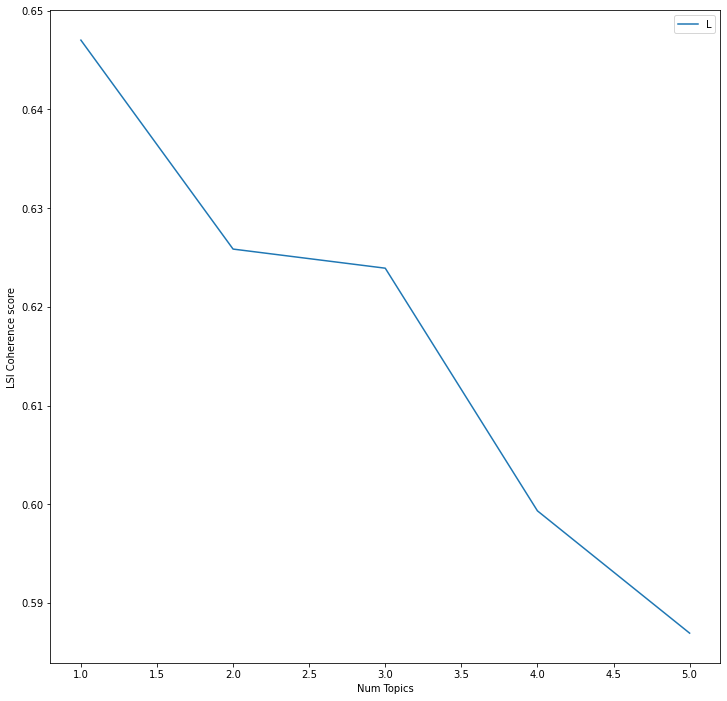

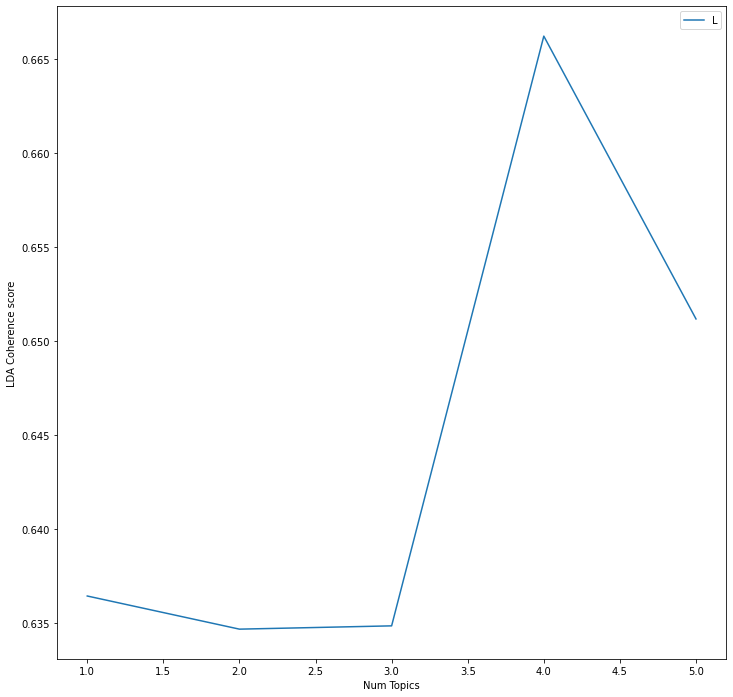

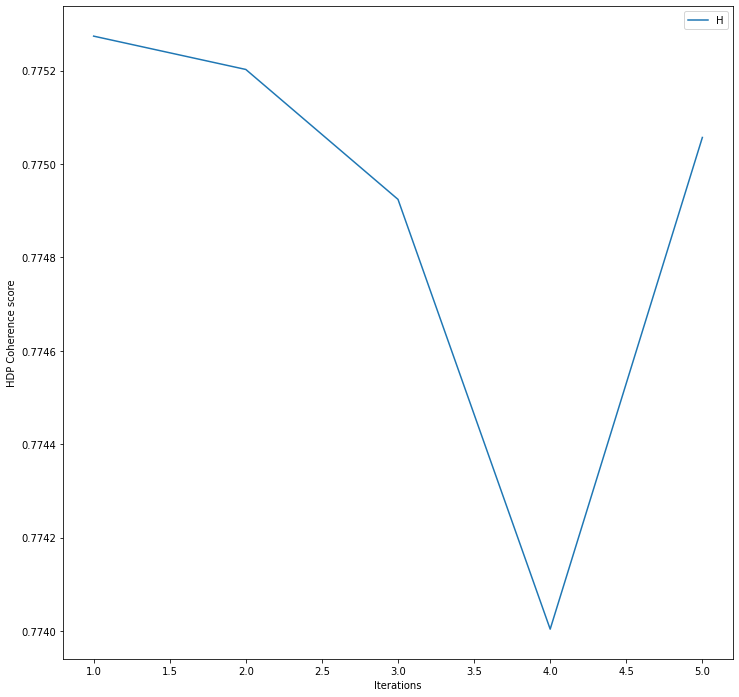

In [32]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x,lsi_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("LSI Coherence score")
plt.legend(("LSI coherence_values"), loc='best')
plt.show()
plt.figure(figsize=(12,12))
plt.plot(x,lda_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("LDA Coherence score")
plt.legend(("LDA coherence_values"), loc='best')
plt.show()
plt.figure(figsize=(12,12))
plt.plot(x,hdp_coherence_values)
plt.xlabel("Iterations")
plt.ylabel("HDP Coherence score")
plt.legend(("Hcoherence_values"), loc='best')
plt.show()

In [33]:
#coherence scores for number of topics for LDA, HDP model  
for m, cv in zip(x, lsi_coherence_values):
    print("LSI Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print("\n")
    
for m, cv in zip(x, lda_coherence_values):
    print("LDP Num Topics =", m, " has Coherence Value of", round(cv, 4))

        

LSI Num Topics = 1  has Coherence Value of 0.647
LSI Num Topics = 2  has Coherence Value of 0.6259
LSI Num Topics = 3  has Coherence Value of 0.6239
LSI Num Topics = 4  has Coherence Value of 0.5993
LSI Num Topics = 5  has Coherence Value of 0.5869


LDP Num Topics = 1  has Coherence Value of 0.6365
LDP Num Topics = 2  has Coherence Value of 0.6347
LDP Num Topics = 3  has Coherence Value of 0.6349
LDP Num Topics = 4  has Coherence Value of 0.6662
LDP Num Topics = 5  has Coherence Value of 0.6512


# Comparison of Coherence values to determine the best model

In [34]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=lemmatized_data, dictionary=id2word, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=lemmatized_data, dictionary=id2word, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=lemmatized_data, dictionary=id2word, window_size=10).get_coherence()

In [35]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.figure(figsize=(10,10))
    plt.bar(x, coherences, width=0.1, tick_label=indices, align='center')
    plt.xlabel('Topic Models')
    plt.ylabel('Coherence Values of all models')

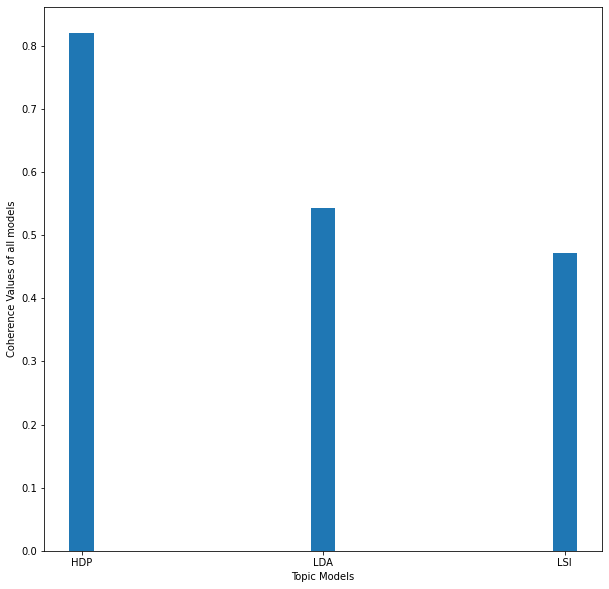

In [36]:
evaluate_bar_graph([hdp_coherence, lda_coherence,lsi_coherence],
                   [ 'HDP', 'LDA','LSI'])

# Conclusion: HDP is a better model based on coherence score

In [37]:
#formatted data of topics for LDA model with num_topics list formed
def format_topics_sentences(lda_model, corpus, texts=data):
   
    lda_sent_topics_df = pd.DataFrame()
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = lda_model.show_topic(topic_num)
                lda_topic_keywords = ", ".join([word for word, prop in wp])
                lda_sent_topics_df = lda_sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), lda_topic_keywords]), ignore_index=True)
            else:
                break
    lda_sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    lda_sent_topics_df = pd.concat([lda_sent_topics_df], axis=1)
    return(lda_sent_topics_df)

df_lda_topic_sents_keywords = format_topics_sentences(lda_model=lda_model_list[3], corpus=corpus, texts=cleanedSentences)
df_dominant_topic = df_lda_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']


df_dominant_topic.head(5)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.8114   
1            1             0.0              0.2500   
2            2             1.0              0.5711   
3            3             3.0              0.8383   
4            4             3.0              0.6222   

                                            Keywords  
0  link, case, virus, people, woman, week, state,...  
1  new, drug, report, health, case, risk, treatme...  
2  link, case, virus, people, woman, week, state,...  
3  study, say, virus, case, life, make, find, app...  
4  study, say, virus, case, life, make, find, app...

In [38]:
#formatted data of topics for HDP model with iterations list formed
def format_topics_sentences_hdp(hdp_model, corpus=corpus, texts=data):
    hda_sent_topics_df = pd.DataFrame()
    for i, row in enumerate(hdp_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = hdp_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                hda_sent_topics_df = hda_sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    hda_sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    hda_sent_topics_df = pd.concat([hda_sent_topics_df], axis=1)
    return(hda_sent_topics_df)
    

df_hda_topic_sents_keywords = format_topics_sentences_hdp(hdp_model=hdp_model_list[3], corpus=corpus, texts=cleanedSentences)
df_hda_topic_sents_keywords.head(5)

df_dominant_topic = df_hda_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']

df_dominant_topic.head(5)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0            69.0              0.7517   
1            1            77.0              0.8344   
2            2            26.0              0.8014   
3            3            16.0              0.5036   
4            4            54.0              0.8580   

                                            Keywords  
0  bionic, illustrate, let, salt, uofl, tax, want...  
1  revision, safe, sample, effort, roll, daughter...  
2  lure, englander, spec, merkel, governor, advan...  
3  rethink, moment, safety, kart, subscription, a...  
4  spinal, disease, load, pap, fund, technology, ...